### Libraries

In [1]:
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

### Read data

In [2]:
df1 = pd.read_excel("malaria_data.xlsx", sheet_name='Data')
df1.head()

,SL.NO,IP NO.,Plasmodium falciparum,Plasmodium malariae,Plasmodium vivax,Plasmodium ovale,Plasmodium knowlesi,FEVER INTENSITY,FEVER DAYS,HEADACHE DAYS,...,Sleep,Skin Rashes,Malaria Details,Medicines,Age,Gender,State,Place,Date of Admission,Date of Discharge
0,1,34567.0,1,0,0,0,0,3,4,2,...,0,1,Positive - Ring forms of pl. falcipharum(++) a...,Inj. Arinatum 120mg IV STAT(3 Doses); Larinate...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,507453.0,0,0,1,0,0,2,5,5,...,0,0,POSITIVE.RING FORMS AND GAMETOCYTES OF PL.FALC...,"TAB.LARNINATE SP KIT,TAB.MALIRID DS OD,INJ.ARI...",46 Years,M,Karnataka,MANGALORE,23-06-2014 / 19:58,26-06-2014 / 14:21
2,3,502278.0,1,0,0,1,0,1,5,1,...,0,0,POSITIVE.RING FORM OF PL.FACIPARUM[+],"TAB.JANUVIA 10MG 0-0-1,TAB.GUMEFINE M2 1 0-0-1",24 Years,M,Karnataka,MANGALORE,18-05-2014 / 23:06,20-05-2014 / 11:53
3,4,489902.0,1,1,0,1,1,3,3,3,...,0,0,positive -ring forms of p.vivax(+) and ring fo...,"T.larinate sp kit ,T.Malarid ds 0-0-1",35 Years,M,Karnataka,MANGALORE,07-02-2014 / 18:42,09-02-2014 / 22:39
4,5,564536.0,0,0,1,1,0,3,4,0,...,0,0,presence of parasites negative,"INJ EMESET 4MG IV TID,SYP ONDEM 5ML TID,LARINA...",46 Years,F,Karnataka,MANGALORE,20-08-2015 / 11:34,22-08-2015 / 16:42


In [3]:
df1.info()
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 63 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SL.NO                              1455 non-null   int64  
 1   IP NO.                             1425 non-null   float64
 2   Plasmodium falciparum              1455 non-null   int64  
 3   Plasmodium malariae                1455 non-null   int64  
 4   Plasmodium vivax                   1455 non-null   int64  
 5   Plasmodium ovale                   1455 non-null   int64  
 6   Plasmodium knowlesi                1455 non-null   int64  
 7   FEVER INTENSITY                    1455 non-null   int64  
 8   FEVER DAYS                         1455 non-null   int64  
 9   HEADACHE DAYS                      1455 non-null   int64  
 10  BODYACHE DAYS                      1455 non-null   int64  
 11  VOMITING DAYS                      1455 non-null   int64

In [4]:
df1.describe()

,SL.NO,IP NO.,Plasmodium falciparum,Plasmodium malariae,Plasmodium vivax,Plasmodium ovale,Plasmodium knowlesi,FEVER INTENSITY,FEVER DAYS,HEADACHE DAYS,...,burning micturition,Diet-Mixed,Previous History of Malaria,PREVIOUS HISTORY OF DENGUE,Bronchial,DROWSY,DISCOMFORT,"Appetite(Good-0, Abnormal=1)",Sleep,Skin Rashes
count,1455.000000,1.425000e+03,1455.000000,1455.000000,1455.00000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,...,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000
mean,723.424742,5.951744e+05,0.224742,0.062543,0.17732,0.008247,0.004124,1.196564,4.043986,0.808935,...,0.048110,0.651546,0.048110,0.004124,0.012371,0.004811,0.017182,0.499656,0.446048,0.010997
std,419.519486,2.229910e+05,0.417556,0.242222,0.38207,0.090471,0.064106,0.628191,2.650580,1.621487,...,0.214072,0.476644,0.214072,0.064106,0.110573,0.069218,0.129994,0.500172,0.497252,0.104322
min,1.000000,3.456700e+04,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,359.500000,5.366830e+05,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,723.000000,5.835630e+05,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,3.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1086.500000,6.619960e+05,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,5.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1450.000000,5.334371e+06,1.000000,1.000000,1.00000,1.000000,1.000000,3.000000,30.000000,25.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
print("Number of Rows: ",df1.shape[0])
print("Number of Columns: ",df1.shape[1])
print()

Number of Rows:  1455
Number of Columns:  63



In [6]:
df1['Date of Admission'] = pd.to_datetime(df1['Date of Admission'])
df1['Date of Discharge'] = pd.to_datetime(df1['Date of Discharge']) # Convert the column to datetime

oldest_admission_date = df1['Date of Admission'].min()
latest_admission_date = df1['Date of Admission'].max()

oldest_discharge_date = df1['Date of Discharge'].min()
latest_discharge_date = df1['Date of Discharge'].max()

print('Oldest Date of Admission:', oldest_admission_date)
print('Latest Date of Admission:', latest_admission_date)
print('Oldest Date of Discharge:', oldest_discharge_date)
print('Latest Date of Discharge:', latest_discharge_date)
print()

Oldest Date of Admission: 2014-02-07 18:42:00
Latest Date of Admission: 2018-06-04 21:49:00
Oldest Date of Discharge: 2014-02-09 22:39:00
Latest Date of Discharge: 2018-06-08 15:26:00



In [7]:
# Empty Dictionary
data_dict = {}

# (i) Patients' demographic information
data_dict['demographic_info'] = ['SL.NO', 'IP NO. ', 'Age', 'Gender', 'State', 'Place', 'Date of Admission', 'Date of Discharge']

# (ii) Symptoms presented by the patient when consulting a doctor
symptoms_cols = ['FEVER INTENSITY', 'FEVER DAYS', 'HEADACHE DAYS', 'BODYACHE DAYS', 'VOMITING DAYS', 'CHILLS DAYS', 'COUGH DAYS',
                 'ABDOMINAL DISCOMFORT DAYS', 'BREATHELESSNESS', 'LOOSE STOOL(STOMACH PROBLEM) DAYS', 'GENERALIZED WEEKNESS DAYS',
                 'PUFINESS in the FACE', 'RUNNING NOSE', 'THROAT PAIN', 'BLEEDING MANIFESTATION', 'RIGORS', 'DECREASED APPETITE',
                 'NAUSEA DAYS', 'SORE THROAT', 'URINAL VARIATION', 'EAR DISCHARGE', 'DROWSY', 'DISCOMFORT', 'Appetite(Good-0, Abnormal=1)',
                 'Sleep', 'Skin Rashes']
data_dict['symptoms'] = symptoms_cols

# (iii) The tests taken and results
tests_cols = ['Plasmodium falciparum', 'Plasmodium malariae', 'Plasmodium vivax', 'Plasmodium ovale ', 'Plasmodium knowlesi',
              'BP(mmhg) systolic', 'BP(mmhg) diastolic', 'PULSE(bpm)', 'RR(breaths/min)', 'TEMP(f)', 'pallor', 'icterus', 'clubbing',
              'cynosis', 'lymphadenopathy', 'pedel oedema', 'burning micturition']
data_dict['tests_results'] = tests_cols

# (iv) Diagnosis based on the laboratory results
diagnosis_cols = ['DIABETICS', 'HEART PROBLEM', 'HYPERTENSION', 'TB', 'ASHTHMA', 'EPILEPSY', 'Previous History of Malaria',
                  'PREVIOUS HISTORY OF DENGUE', 'Bronchial', 'Malaria Details']
data_dict['diagnosis'] = diagnosis_cols

# (v) The treatment provided
treatment_cols = ['Medicines']
data_dict['treatment'] = treatment_cols

In [8]:
# Assuming data_dict is your dictionary
df_dict = {key: pd.DataFrame(val, columns=[key]) for key, val in data_dict.items()}

# Find the maximum length among the DataFrames
max_len = max(len(dataframe) for dataframe in df_dict.values())

# Make all DataFrames the same length by filling with empty strings
for key, dataframe in df_dict.items():
    df_dict[key] = dataframe.reindex(range(max_len)).fillna(" ")

# Concatenate all the DataFrames
result_df = pd.concat(df_dict.values(), axis=1)

result_df

,demographic_info,symptoms,tests_results,diagnosis,treatment
0,SL.NO,FEVER INTENSITY,Plasmodium falciparum,DIABETICS,Medicines
1,IP NO.,FEVER DAYS,Plasmodium malariae,HEART PROBLEM,
2,Age,HEADACHE DAYS,Plasmodium vivax,HYPERTENSION,
3,Gender,BODYACHE DAYS,Plasmodium ovale,TB,
4,State,VOMITING DAYS,Plasmodium knowlesi,ASHTHMA,
5,Place,CHILLS DAYS,BP(mmhg) systolic,EPILEPSY,
6,Date of Admission,COUGH DAYS,BP(mmhg) diastolic,Previous History of Malaria,
7,Date of Discharge,ABDOMINAL DISCOMFORT DAYS,PULSE(bpm),PREVIOUS HISTORY OF DENGUE,
8,,BREATHELESSNESS,RR(breaths/min),Bronchial,
9,,LOOSE STOOL(STOMACH PROBLEM) DAYS,TEMP(f),Malaria Details,


### Clean Data

In [9]:
df1 = df1.drop(columns=['SL.NO', 'IP NO. ','RR(breaths/min)', 'Malaria Details','Medicines']) #Removing columns with max null values
df1 = df1.replace(' ', np. nan)
df1 = df1.dropna()

# Extract numerical part from the 'Age' column, handling missing values
df1['Age'] = df1['Age'].str.extract('(\d+)').astype(int)

#### Target Class

In [10]:
# Create a new column 'target_class' based on the conditions
df1['target_class'] = df1[['Plasmodium falciparum', 'Plasmodium malariae',
                         'Plasmodium vivax', 'Plasmodium ovale ', 'Plasmodium knowlesi']].apply(lambda row: 'No Malaria' if all(val == 0 for val in row) else 'Malaria', axis=1)

In [11]:
df1['target_class'].value_counts()

target_class
No Malaria    906
Malaria       439
Name: count, dtype: int64

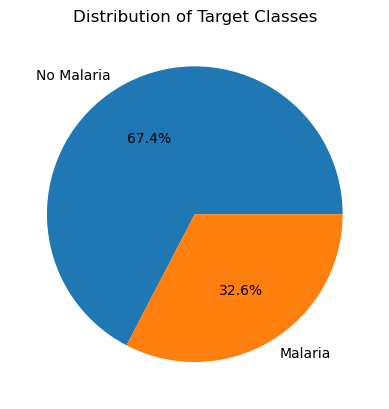

In [12]:
# Plot the pie chart with counts
plt.pie(df1['target_class'].value_counts(), labels=df1['target_class'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Target Classes')
plt.show()

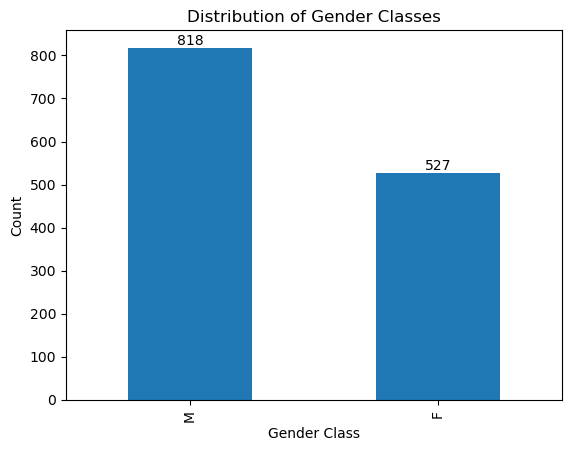

In [13]:
# Plot the bar graph
ax = df1['Gender'].value_counts().plot(kind='bar')
plt.title('Distribution of Gender Classes')
plt.xlabel('Gender Class')
plt.ylabel('Count')

# Add count on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

In [14]:
# Replace the labels
df = df1.copy()
df['Gender'] = df['Gender'].replace({'M': 1, 'F': 2})
df['State'] = df['State'].replace({'Karnataka': 12, 'Kerala': 13, 'Others':29})
df['target_class'] = df['target_class'].replace({'Malaria':1,'No Malaria':0})

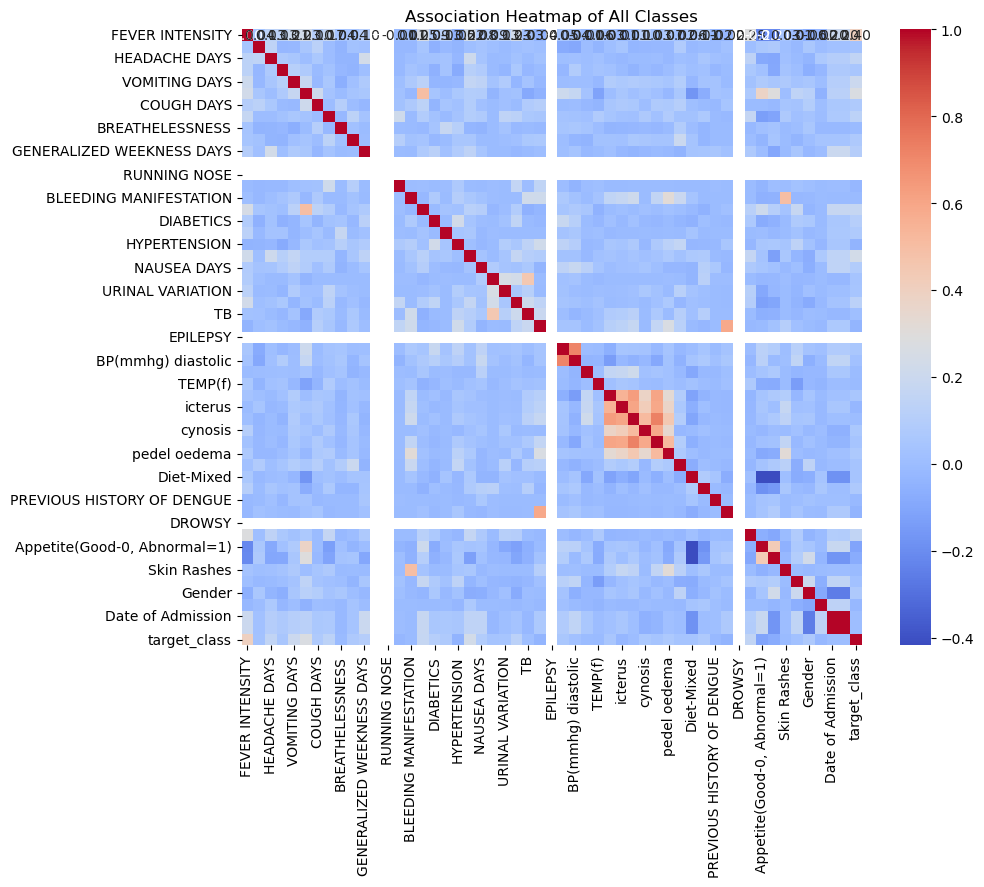

In [15]:
df_main_classes = df.drop(columns=['Place','Plasmodium falciparum', 'Plasmodium malariae', 'Plasmodium vivax',
                                    'Plasmodium ovale ', 'Plasmodium knowlesi'])

# Calculate the correlation matrix
correlation_matrix = df_main_classes.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Association Heatmap of All Classes')
plt.show()

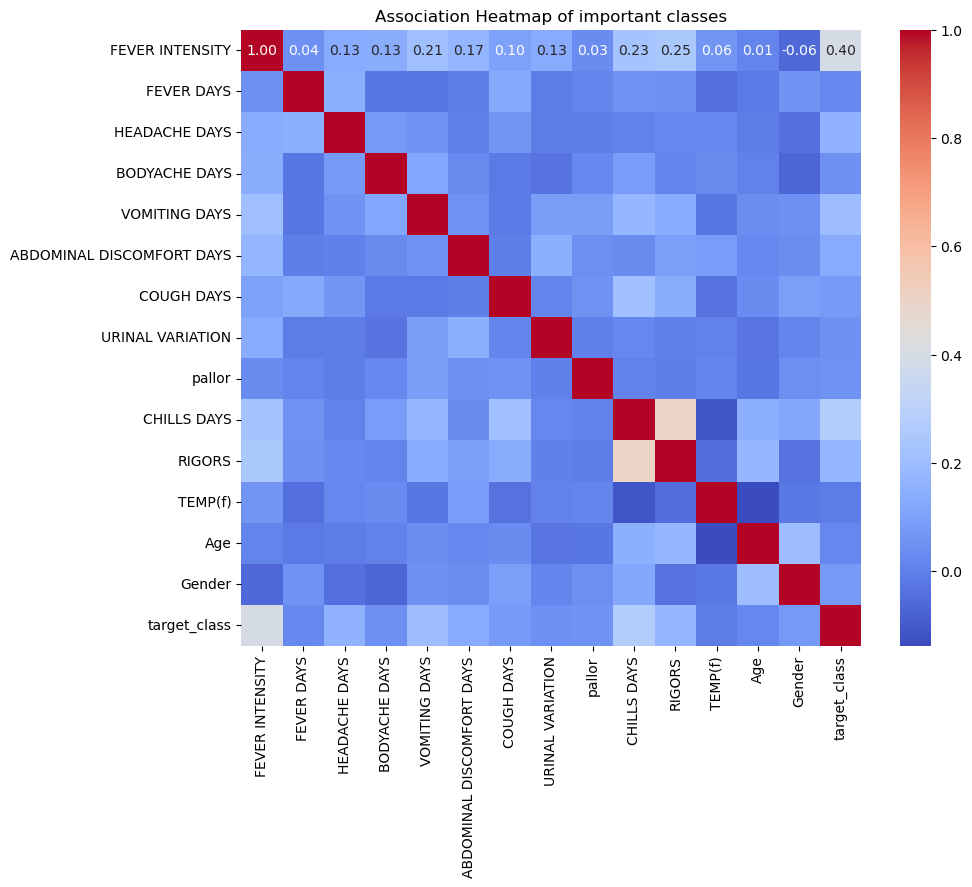

In [16]:
df_imp_class = df[['FEVER INTENSITY', 'FEVER DAYS', 'HEADACHE DAYS', 'BODYACHE DAYS', 'VOMITING DAYS',
           'ABDOMINAL DISCOMFORT DAYS','COUGH DAYS', 'URINAL VARIATION','pallor','CHILLS DAYS','RIGORS',
           'TEMP(f)', 'Age', 'Gender',
           'target_class']]

# Calculate the correlation matrix
correlation_matrix = df_imp_class.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Association Heatmap of important classes')
plt.show()

### Finding important featurs

In [17]:
## Important features from all features using Random Forest
# Separate features (X) and target variable (y)
X = df.drop(columns=['target_class','Place','Date of Admission', 'Date of Discharge',
                    'Plasmodium falciparum', 'Plasmodium malariae', 'Plasmodium vivax',
                     'Plasmodium ovale ', 'Plasmodium knowlesi'])
y = df['target_class']

# Train a Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X, y)

# Extract feature importances and create a DataFrame to store them
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features by their importances
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Print the ranked features
print("Ranking of features:")
feature_importance_df

Ranking of features:


,Feature,Importance
26,EPILEPSY,0.000000
12,RUNNING NOSE,0.000000
42,DROWSY,0.000000
11,PUFINESS in the FACE,0.000000
21,SORE THROAT,0.000159
13,THROAT PAIN,0.000427
40,PREVIOUS HISTORY OF DENGUE,0.000438
14,BLEEDING MANIFESTATION,0.000702
41,Bronchial,0.000721
36,pedel oedema,0.001035


In [18]:
## Importance of features from 12 selected features using Random Forest
# Separate features (X) and target variable (y)
X = df_imp_class.drop(columns=['target_class'])
y = df_imp_class['target_class']

# Train a Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X, y)

# Extract feature importances and create a DataFrame to store them
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features by their importances
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Print the ranked features
print("Ranking of features:")
feature_importance_df

Ranking of features:


,Feature,Importance
7,URINAL VARIATION,0.006201
5,ABDOMINAL DISCOMFORT DAYS,0.015459
8,pallor,0.019203
6,COUGH DAYS,0.025348
10,RIGORS,0.032156
13,Gender,0.033285
3,BODYACHE DAYS,0.034710
4,VOMITING DAYS,0.037729
9,CHILLS DAYS,0.055255
2,HEADACHE DAYS,0.082459


## Summary of patients who have malaria

In [35]:
df2 = df1.copy()

In [37]:
df_imp_class.count()

FEVER INTENSITY              1345
FEVER DAYS                   1345
HEADACHE DAYS                1345
BODYACHE DAYS                1345
VOMITING DAYS                1345
ABDOMINAL DISCOMFORT DAYS    1345
COUGH DAYS                   1345
URINAL VARIATION             1345
pallor                       1345
CHILLS DAYS                  1345
RIGORS                       1345
TEMP(f)                      1345
Age                          1345
Gender                       1345
target_class                 1345
dtype: int64

In [38]:
# Define the age bins and labels
bins = range(0, 101, 10)
labels = [f'{i}-{i+9}' for i in bins[:-1]] 

# Create a new column with age categories
df2['AgeGroup'] = pd.cut(df2['Age'], bins=bins, labels=labels, right=False)

# Group by the new age categories and target_class, then unstack
age_grouped = df2.groupby('AgeGroup')['target_class'].value_counts().unstack(fill_value=0)
age_grouped['Total'] = age_grouped.sum(axis=1)
age_grouped

target_class,Malaria,No Malaria,Total
AgeGroup,,,
0-9,1,6,7
10-19,8,42,50
20-29,211,394,605
30-39,48,94,142
40-49,110,251,361
50-59,30,62,92
60-69,23,29,52
70-79,2,6,8
80-89,6,22,28


In [39]:
gender_summary = df2.groupby('Gender')['target_class'].value_counts().unstack(fill_value=0)
gender_summary['Total'] = gender_summary.sum(axis=1)
gender_summary # 0 - No Malaria, 1 - Malaria

target_class,Malaria,No Malaria,Total
Gender,,,
F,194,333,527
M,245,573,818


In [40]:
pallor_summary = df2.groupby('pallor')['target_class'].value_counts().unstack(fill_value=0)
pallor_summary['Total'] = pallor_summary.sum(axis=1)
pallor_summary

target_class,Malaria,No Malaria,Total
pallor,,,
0,403,855,1258
1,36,51,87


In [41]:
df2['RIGORS'] = df2['RIGORS'].replace({0: "No", 1: "Yes"})

rigor_summary = df2.groupby('RIGORS')['target_class'].value_counts().unstack(fill_value=0)
rigor_summary['Total'] = rigor_summary.sum(axis=1)
rigor_summary

target_class,Malaria,No Malaria,Total
RIGORS,,,
No,184,546,730
Yes,255,360,615


In [42]:
df2['URINAL VARIATION'] = df2['URINAL VARIATION'].replace({0: "No", 1: "Yes"})

urine_summary = df2.groupby('URINAL VARIATION')['target_class'].value_counts().unstack(fill_value=0)
urine_summary['Total'] = urine_summary.sum(axis=1)
urine_summary

target_class,Malaria,No Malaria,Total
URINAL VARIATION,,,
No,431,899,1330
Yes,8,7,15


In [47]:
state_summary = df2.groupby('State')['target_class'].value_counts().unstack(fill_value=0)
state_summary['Total'] = state_summary.sum(axis=1)
state_summary

target_class,Malaria,No Malaria,Total
State,,,
Karnataka,411,843,1254
Kerala,26,55,81
Others,2,8,10


Looks like the study has highest number of people from Karnataka of about 1254, among which 411 have malaria. About 81 are from the state of Kerala, where 26 have malaria. Rest out of 10 people from other states, about 2 had malaria.    


In [48]:
df2['FEVER INTENSITY'] = df2['FEVER INTENSITY'].replace({0: "No Fever", 1: "Low Grade Fever", 2:"Intermittent Fever", 3:"High Grade Fever"})

fever_intensity = df2.groupby('FEVER INTENSITY')['target_class'].value_counts().unstack(fill_value=0)
fever_intensity['Total'] = fever_intensity.sum(axis=1)
fever_intensity # 0 - No Malaria, 1 - Malaria

target_class,Malaria,No Malaria,Total
FEVER INTENSITY,,,
High Grade Fever,87,12,99
Intermittent Fever,45,6,51
Low Grade Fever,303,854,1157
No Fever,4,34,38


In [49]:
# Define the days and labels
bins = range(0, 31, 10)
labels = [f'{i}-{i+9}' for i in bins[:-1]] 

# Create a new column with age categories
df2['FeverDaysGroup'] = pd.cut(df2['FEVER DAYS'], bins=bins, labels=labels, right=False)

fever_days = df2.groupby('FeverDaysGroup')['target_class'].value_counts().unstack(fill_value=0)
fever_days['Total'] = fever_days.sum(axis=1)
fever_days

target_class,Malaria,No Malaria,Total
FeverDaysGroup,,,
0-9,418,874,1292
10-19,19,31,50
20-29,0,1,1


In [50]:
# Define the days and labels
bins = range(0, 31, 10)
labels = [f'{i}-{i+9}' for i in bins[:-1]] 

# Create a new column with age categories
df2['HeadacheGroup'] = pd.cut(df2['HEADACHE DAYS'], bins=bins, labels=labels, right=False)

headache_days = df2.groupby('HeadacheGroup')['target_class'].value_counts().unstack(fill_value=0)
headache_days['Total'] = headache_days.sum(axis=1)
headache_days

target_class,Malaria,No Malaria,Total
HeadacheGroup,,,
0-9,435,905,1340
10-19,3,0,3
20-29,1,1,2


In [51]:
# Define the days and labels
bins = range(0, 10, 2)
labels = [f'{i}-{i+2}' for i in bins[:-1]]  

# Create a new column with age categories
df2['BodyacheGroup'] = pd.cut(df2['BODYACHE DAYS'], bins=bins, labels=labels, right=False)

bodyache_days = df2.groupby('BodyacheGroup')['target_class'].value_counts().unstack(fill_value=0)
bodyache_days['Total'] = bodyache_days.sum(axis=1)
bodyache_days

target_class,Malaria,No Malaria,Total
BodyacheGroup,,,
0-2,432,906,1338
2-4,6,0,6
4-6,1,0,1
6-8,0,0,0


In [52]:
# Define the days and labels
bins = range(0, 10, 2)
labels = [f'{i}-{i+2}' for i in bins[:-1]] 

# Create a new column with age categories
df2['VomitingGroup'] = pd.cut(df2['VOMITING DAYS'], bins=bins, labels=labels, right=False)

vomiting_days = df2.groupby('VomitingGroup')['target_class'].value_counts().unstack(fill_value=0)
vomiting_days['Total'] = vomiting_days.sum(axis=1)
vomiting_days

target_class,Malaria,No Malaria,Total
VomitingGroup,,,
0-2,424,906,1330
2-4,13,0,13
4-6,2,0,2
6-8,0,0,0


In [53]:
bins = range(0, 10, 2)
labels = [f'{i}-{i+2}' for i in bins[:-1]] 

# Create a new column with age categories
df2['chillsGroup'] = pd.cut(df2['CHILLS DAYS'], bins=bins, labels=labels, right=False)

chills_days = df2.groupby('chillsGroup')['target_class'].value_counts().unstack(fill_value=0)
chills_days['Total'] = chills_days.sum(axis=1)
chills_days

target_class,Malaria,No Malaria,Total
chillsGroup,,,
0-2,436,906,1342
2-4,2,0,2
4-6,0,0,0
6-8,1,0,1


In [54]:
bins = range(0, 10, 2)
labels = [f'{i}-{i+2}' for i in bins[:-1]] 

# Create a new column with age categories
df2['AbdpainGroup'] = pd.cut(df2['ABDOMINAL DISCOMFORT DAYS'], bins=bins, labels=labels, right=False)

abd_pain_days = df2.groupby('AbdpainGroup')['target_class'].value_counts().unstack(fill_value=0)
abd_pain_days['Total'] = abd_pain_days.sum(axis=1)
abd_pain_days

target_class,Malaria,No Malaria,Total
AbdpainGroup,,,
0-2,437,906,1343
2-4,2,0,2
4-6,0,0,0
6-8,0,0,0


In [70]:
bins = range(0, 12, 2)
labels = [f'{i}-{i+2}' for i in bins[:-1]] 

# Create a new column with age categories
df2['coughGroup'] = pd.cut(df2['COUGH DAYS'], bins=bins, labels=labels, right=False)

cough_days = df2.groupby('coughGroup')['target_class'].value_counts().unstack(fill_value=0)
cough_days['Total'] = cough_days.sum(axis=1)
cough_days

target_class,Malaria,No Malaria,Total
coughGroup,,,
0-2,433,906,1339
2-4,2,0,2
4-6,2,0,2
6-8,1,0,1
8-10,1,0,1


In [68]:
bins = range(94, 110, 3)
labels = [f'{i}-{i+2}' for i in bins[:-1]] 

# Create a new column with age categories
df2['tempGroup'] = pd.cut(df2['TEMP(f)'], bins=bins, labels=labels, right=False)

temp = df2.groupby('tempGroup')['target_class'].value_counts().unstack(fill_value=0)
temp['Total'] = temp.sum(axis=1)
temp

target_class,Malaria,No Malaria,Total
tempGroup,,,
94-96,1,1,2
97-99,405,790,1195
100-102,29,108,137
103-105,4,6,10
106-108,0,1,1
